# Assignment 02

In [31]:
# packages
import pandas as pd
import math
import matplotlib.pyplot as plt

# 1.Significant earthquakes since 2150 B.C.

In [32]:
Sig_Eqs = pd.read_csv('earthquakes-2022-10-23_16-40-15_+0800.tsv',sep = '\t')
Sig_Eqs

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,NaN,-1566.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,ISRAEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,NaN,2022.0,5.0,26.0,12.0,2.0,20.0,NaN,NaN,PERU,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,87.0,2.0
6334,NaN,2022.0,6.0,9.0,17.0,28.0,37.0,NaN,NaN,CHINA,...,NaN,NaN,4.0,1.0,NaN,2.0,NaN,3.0,NaN,NaN
6335,NaN,2022.0,7.0,12.0,23.0,36.0,11.0,NaN,NaN,PERU,...,NaN,NaN,3.0,1.0,NaN,3.0,5.0,1.0,787.0,3.0
6336,NaN,2022.0,10.0,5.0,0.0,21.0,29.0,NaN,NaN,IRAN,...,NaN,NaN,1127.0,4.0,NaN,3.0,NaN,2.0,NaN,3.0


# 1.1 Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top 20 countries along with the total number of deaths.

In [33]:
# Total number of deaths caused by earthquakes since 2150 B.C. in each country
Sig_Eqs.groupby('Country').sum().sort_values('Total Deaths'
                        ,ascending = False)[['Total Deaths']]

,Total Deaths
Country,
CHINA,2041903.0
TURKEY,927459.0
IRAN,758647.0
SYRIA,437700.0
ITALY,422678.0
...,...
PALAU,0.0
SAINT VINCENT AND THE GRENADINES,0.0
SAUDI ARABIA,0.0


In [34]:
#  The top 20 countries along with the total number of deaths.
Sig_Eqs.groupby('Country').sum().sort_values('Total Deaths'
                        ,ascending = False)[['Total Deaths']].head(20)

,Total Deaths
Country,
CHINA,2041903.0
TURKEY,927459.0
IRAN,758647.0
SYRIA,437700.0
ITALY,422678.0
JAPAN,355140.0
HAITI,323772.0
AZERBAIJAN,310119.0
INDONESIA,282153.0


# 1.2 Compute the total number of earthquakes with magnitude larger than 3.0 (use column Ms as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?

In [35]:
#  Total number of earthquakes with magnitude larger than 3.0 
#  Worldwide TOTAL.
print(      len(Sig_Eqs['Ms'][Sig_Eqs['Ms']>3])
      ==    Sig_Eqs.loc[Sig_Eqs['Ms']>3].groupby(['Year']).count()['Ms'].sum()     )

print(len(Sig_Eqs['Ms'][Sig_Eqs['Ms']>3]))

print(Sig_Eqs.loc[Sig_Eqs['Ms']>3].groupby(['Year']).count()['Ms'].sum())

True
2984
2984


In [36]:
# Total number of earthquakes with magnitude 
# larger than 3.0 worldwide each year
Sig_Eqs.loc[Sig_Eqs['Ms']>3].groupby(['Year']).count()[['Ms']]

,Ms
Year,
-2000.0,1
-479.0,1
-426.0,1
-400.0,1
-373.0,1
...,...
2011.0,30
2012.0,34
2013.0,20


<AxesSubplot:xlabel='Year'>

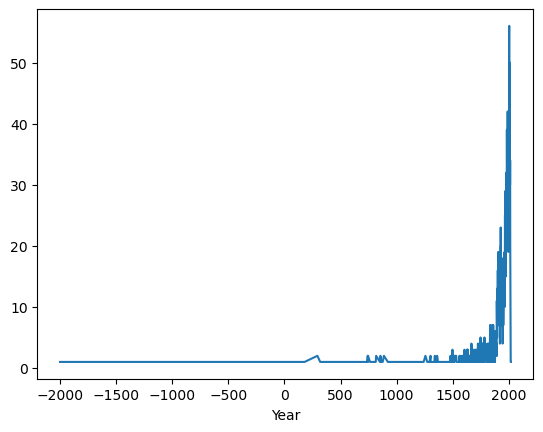

In [37]:
# Plot
Sig_Eqs.loc[Sig_Eqs['Ms']>3].groupby(['Year']).count()['Ms'].plot()

# Earthquake happens more frequently especially during recent 500 years. 
# The melting of glaciers reduces its pressure on earth crust leading active movements. Global warming results in melting of glaciers.

# 1.3 Write a function CountEq_LargestEq that returns (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) date and location of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.

In [38]:
# Groupby Country and count ALL records.
Sig_EqsGRPB = Sig_Eqs.groupby('Country').count()

# For a earthquake, it must have a when and where.
# So the year counts and earthquakes number have the same value.
Sig_EqsGRPB['Count'] = Sig_EqsGRPB['Year']

# return the earthquake counts
def CountEq(country):
    return Sig_EqsGRPB.loc['%s'%(country)]['Count']

def CountEq_LargestEq(country):
    # Find the largest Magnitude of earthquake for the given country.
    LargestEqMsValue = Sig_Eqs[['Country','Ms']].groupby('Country').max()['Ms'][country]
    
    # If 'Ms' data is missing. Just show Earthquake Number
    if pd.isna(LargestEqMsValue):
        Sig_Eqs1_3 = Sig_Eqs[(Sig_Eqs['Country']==country)]
        
        # Create a new dataframe as output.
        Sig_Eqs1_3R = Sig_Eqs1_3[['Year','Mo','Dy','Country','Location Name','Ms']].groupby('Country').max()
        
        # set Earthquake_Number
        Sig_Eqs1_3R['Earthquake_Number'] = CountEq(country)
        
        return Sig_Eqs1_3R
    
    # Find the row with largest Magnitude.
    Sig_Eqs1_3 = Sig_Eqs[(Sig_Eqs['Ms']==LargestEqMsValue) & (Sig_Eqs['Country']==country)]
    
    # Create a new dataframe as output.
    Sig_Eqs1_3R = Sig_Eqs1_3[['Year','Mo','Dy','Country','Location Name','Ms']].groupby('Country').max()
    
    # set Earthquake_Number
    Sig_Eqs1_3R['Earthquake_Number'] = CountEq(country)
    
    return Sig_Eqs1_3R

# Function test
#print(CountEq_LargestEq('CHINA'))
CountEq_LargestEq('ZAMBIA')


,Year,Mo,Dy,Location Name,Ms,Earthquake_Number
Country,,,,,,
ZAMBIA,2017.0,2.0,24.0,ZAMBIA: KAPUTA,NaN,1


In [39]:
# Country List
Country_List = Sig_Eqs.groupby('Country').count().index

# Create a new dataframe
result = CountEq_LargestEq(Country_List[0])

# Connect countries
for i in range(1,156):
    result = pd.concat([result,CountEq_LargestEq(Country_List[i])])

# Show dataframe 
result.sort_values('Ms',ascending = False)

,Year,Mo,Dy,Location Name,Ms,Earthquake_Number
Country,,,,,,
USA,1957.0,3.0,9.0,ALASKA,9.1,271
INDONESIA,2004.0,12.0,26.0,INDONESIA: SUMATRA: ACEH: OFF WEST COAST,8.8,405
INDIA,1897.0,6.0,12.0,INDIA: ASSAM; BANGLADESH,8.7,99
CHILE,1730.0,7.0,8.0,CHILE: VALPARAISO,8.7,198
PHILIPPINES,1897.0,9.0,21.0,"PHILIPPINES: MINDANAO, ZAMBOANGA, SULU, ISABELA",8.7,222
...,...,...,...,...,...,...
SRI LANKA,1882.0,1.0,NaN,SRI LANKA: TRINCOMALEE,NaN,1
SWITZERLAND,2006.0,12.0,29.0,SWITZERLAND: HAUT-VALAIS,NaN,31
TOGO,1933.0,5.0,19.0,TOGO: GOLD COAST,NaN,2


In [40]:
# The last 20 countries. 
result.sort_values('Ms',ascending = False).tail(20)

,Year,Mo,Dy,Location Name,Ms,Earthquake_Number
Country,,,,,,
COMOROS,2018.0,5.0,15.0,COMOROS: MAYOTTE,NaN,1
COTE D'IVOIRE,1889.0,2.0,11.0,COTE D'IVOIRE: BAIBU,NaN,2
CZECH REPUBLIC,2008.0,11.0,22.0,CZECH REPUBLIC: KARVINA,NaN,1
FRENCH GUIANA,1885.0,8.0,4.0,FRENCH GUIANA: CAYENNE,NaN,2
GRENADA,1822.0,12.0,1.0,GRENADA,NaN,1
HUNGARY,2006.0,12.0,31.0,"HUNGARY: PISHKOL'T, ERENDREYD, DENGELEG",NaN,5
IRELAND,1490.0,NaN,NaN,"IRELAND: SLIGO, MAYO",NaN,1
KIRIBATI,1905.0,6.0,30.0,KIRIBATI: PHOENIX ISLANDS,NaN,1
LEBANON,2008.0,11.0,25.0,LEBANON: TARABULUS (TRIPPOLES),NaN,14


# 2. Air temperature in Shenzhen during the past 25 years

In [41]:
Air_T = pd.read_csv('Baoan_Weather_1998_2022.csv',low_memory=False)

In [42]:
# Functions for filter the data

# sign to get '+' or '-'
def sign(TMP):
    return TMP[0]

# tens to get number in ten units position
def tens(TMP):
    return TMP[2]

# one to get number in one units position
def one(TMP):
    return TMP[3]

# point to get the number after the dot'.' 
def point(TMP):
    return TMP[4]

# tmprat to get temperature in number
def tmprat(sign, tens, one, point):
    temp = int(tens)*10 + int(one) + int(point) * 0.1
    if sign =='+' :
        return temp
    else:
        return 0-temp

# quality to get quality of the data
def quality(TMP):
    return TMP[6]

# get the year
def AIRtoYear(DATE):
    return DATE.split('T')[0].split('-')[0]

# get the month
def AIRtoMonth(DATE):
    return DATE.split('T')[0].split('-')[1]

In [43]:
# Filter Process

# Create a new column to store Temperature number.
Air_T['Temperature'] = Air_T.apply(lambda col: tmprat(sign(col['TMP']),
                                                      tens(col['TMP']),
                                                      one(col['TMP']), 
                                                      point(col['TMP'])), axis=1)

# Create a new column to store Temperature data Quality.
Air_T['Quality'] = Air_T.apply(lambda col: quality(col['TMP']),axis=1)


# Clean data.
Air_T_Drop = Air_T.drop(index=Air_T[Air_T['Temperature'] == 99.9].index)

# Introduce a new date year-month.
Air_T_Drop['NEW_DATE'] = Air_T_Drop.apply(lambda col: AIRtoYear(col['DATE'])
                                       + '-'+ AIRtoMonth(col['DATE']),axis=1)


In [44]:
# Filtered Dataframe 
Air_T_Drop

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AG1,...,SOURCE.1,TMP,UA1,UG1,VIS,WG1,WND,Temperature,Quality,NEW_DATE
0,59493099999,1998-01-01T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,9,1",NaN,NaN,"0,000",...,4,"+0186,1",NaN,NaN,"008000,1,N,1",NaN,"040,1,N,0040,1",18.6,1,1998-01
1,59493099999,1998-01-01T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,4,"+0220,1",NaN,NaN,"003300,1,N,1",NaN,"130,1,N,0020,1",22.0,1,1998-01
2,59493099999,1998-01-01T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,4,"+0240,1",NaN,NaN,"003500,1,N,1",NaN,"110,1,N,0020,1",24.0,1,1998-01
3,59493099999,1998-01-01T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,"0,000",...,4,"+0221,1",NaN,NaN,"011000,1,N,1",NaN,"090,1,N,0020,1",22.1,1,1998-01
4,59493099999,1998-01-01T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,4,"+0240,1",NaN,NaN,"005000,1,N,1",NaN,"270,1,N,0030,1",24.0,1,1998-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235669,59493099999,2022-10-10T20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,4,"+0210,1",NaN,NaN,"009900,5,9,9",NaN,"030,1,N,0060,1",21.0,1,2022-10
235670,59493099999,2022-10-10T21:00:00,4,FM-12,99999,V020,"06,0000,9,1","12,0000,9,1","24,0000,9,1",NaN,...,4,"+0201,1",NaN,NaN,"030000,1,9,9",NaN,"020,1,N,0030,1",20.1,1,2022-10
235671,59493099999,2022-10-10T21:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,4,"+0200,1",NaN,NaN,"009900,5,9,9",NaN,"020,1,N,0040,1",20.0,1,2022-10
235672,59493099999,2022-10-10T22:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,4,"+0200,1",NaN,NaN,"009900,5,9,9",NaN,"020,1,V,0060,1",20.0,1,2022-10


<AxesSubplot:xlabel='NEW_DATE'>

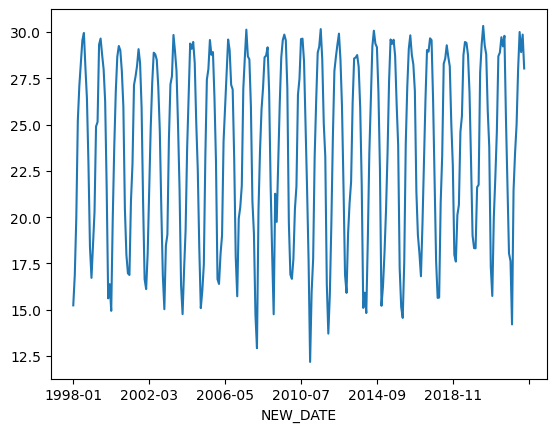

In [45]:
# Monthly averaged air temperature against the observation time.
Air_T_Drop.groupby('NEW_DATE').mean()['Temperature'].plot()

# There is a tiny increasing trend.

# 3.Global collection of hurricanes

In [46]:
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17), # the rest cols are useless. 
                 skiprows=[1, 2], # first two rows are instructions.
                 parse_dates=['ISO_TIME'], # Transform TIME format. dataframe timeseries format.
                 na_values=['NOT_NAMED', 'NAME'])
                #,low_memory=False)

C:\Users\92341\AppData\Local\Temp\ipykernel_5296\288363062.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


In [47]:
df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,,,,main,0,0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,,,,main,0,0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,,,,main,0,0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,,,,main,0,0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,,,,main,0,0,__________P___
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707171,2022284N16268,2022,79,NaN,GM,KARL,2022-10-12 21:00:00,TS,22.2799,-94.3074,,,,PROVISIONAL,319,319,P_____________
707172,2022284N16268,2022,79,NaN,GM,KARL,2022-10-13 00:00:00,TS,22.4000,-94.2333,,,,PROVISIONAL,331,,O_____________
707173,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.2000,151.3000,,,,PROVISIONAL,1985,1974,O_____________
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.0500,151.3250,,,,PROVISIONAL,1974,1952,P_____________


# 3.1Group the data on Storm Identifie (SID), report names (NAME) of the 10 largest hurricanes according to wind speed (WMO_WIND).

In [48]:
# Sort by wind speed.
df3_1 = df.groupby('NAME').max().sort_values('WMO_WIND',ascending=False)

C:\Users\92341\AppData\Local\Temp\ipykernel_5296\3256089426.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df3_1 = df.groupby('NAME').max().sort_values('WMO_WIND',ascending=False)


In [49]:
# 10 largest hurricanes according to wind speed
df3_1[['WMO_WIND']].head(10)

,WMO_WIND
NAME,
DENISE,95
ELINE:LEONE,95
MAHA,95
EARL,95
EASY,95
ED,95
MAEMI,95
MABEL,95
MA-ON,95


# 3.2 Make a bar chart of the wind speed (WMO_WIND) of the 20 strongest-wind hurricanes.

<AxesSubplot:xlabel='NAME'>

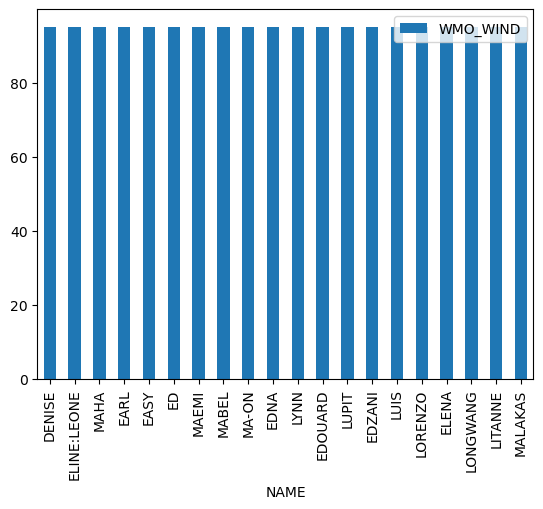

In [50]:
# 20 strongest-wind hurricanes.
def3_1plot = df3_1[['WMO_WIND']].head(20)

# To number
def3_1plot['WMO_WIND'] = pd.to_numeric(def3_1plot['WMO_WIND'])

# Plot
def3_1plot.plot(kind = 'bar')

# 3.3 Plot the count of all datapoints by Basin as a bar chart.

<AxesSubplot:xlabel='BASIN'>

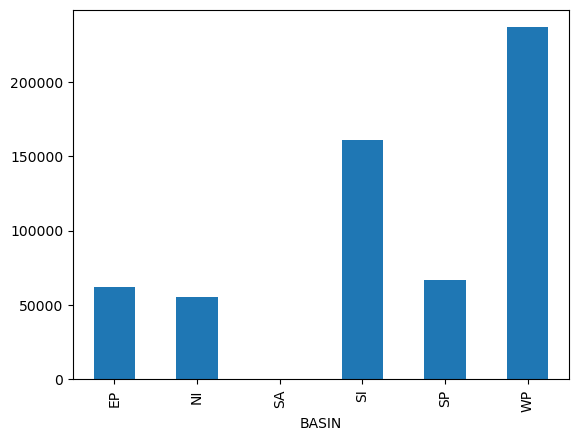

In [51]:
# Plot the count of all datapoints by Basin as a bar chart.
df.groupby('BASIN').count()['SID'].plot(kind='bar')

# 3.4 Make a hexbin plot of the location of datapoints in Latitude and Longitude.

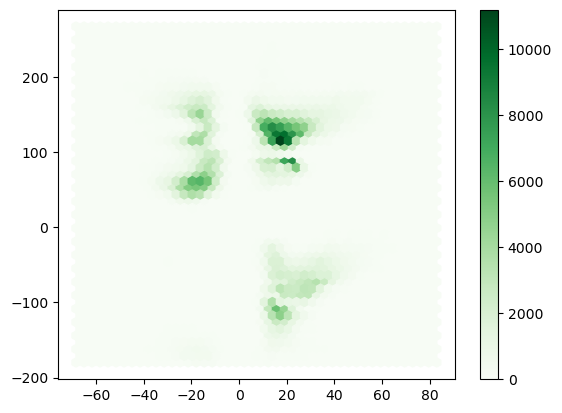

In [52]:
# Hex plot
Hex = plt.hexbin(df['LAT'], df['LON'], gridsize = 45,cmap ='Greens')

# color bar
cb = plt.colorbar(Hex) 

# show plot
plt.show()

# 3.5 Find Typhoon Mangkhut (from 2018) and plot its track as a scatter plot.

In [53]:
# to plot track, find its longitude and latitude.
lat3_5 = df.loc[ (df['NAME']=='MANGKHUT') & (df['SEASON'] == 2018)]['LAT']
lon3_5 = df.loc[ (df['NAME']=='MANGKHUT') & (df['SEASON'] == 2018)]['LON']

Text(167, 13, 'Start')

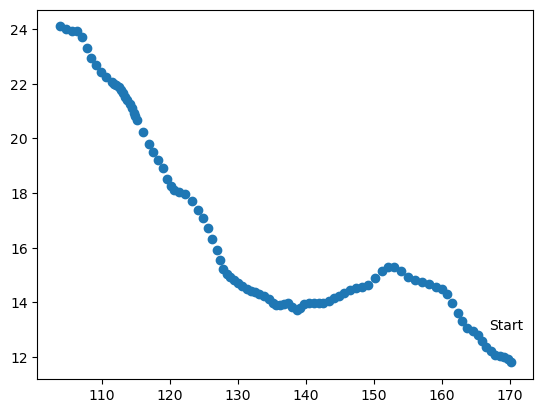

In [54]:
# longitude - x     latitude - y
plt.scatter(lon3_5,lat3_5)
# Mark the start point
plt.text(167,13,'Start')

# 3.6 Create a filtered dataframe that contains only data since 1970 from the Western North Pacific (“WP”) and Eastern North Pacific (“EP”) Basin. Use this for the rest of the problem set.

In [55]:
df3_6 = df.loc[ (df['SEASON'] >= 1970) & (  (df['BASIN']=='WP')  |  (df['BASIN'] =='EP')  ) ]

df3_6

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,,1006,tokyo,main,1088,1088,_OO___________
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,,,,main,1109,1109,_PP___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,,1002,tokyo,main,1143,1143,_OO___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,,,,main,1171,1168,_PP___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,,998,tokyo,main,1182,1179,_OO___________
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707084,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,,,,PROVISIONAL,0,0,P_____________
707085,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,,,,PROVISIONAL,0,,O_____________
707173,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,,,,PROVISIONAL,1985,1974,O_____________
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,,,,PROVISIONAL,1974,1952,P_____________


# 3.7 Plot the number of datapoints per day.

C:\Users\92341\AppData\Local\Temp\ipykernel_5296\4007816809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_6['NEW_TIME'] = df3_6['ISO_TIME'].dt.strftime('%Y-%m-%d')


<AxesSubplot:xlabel='NEW_TIME'>

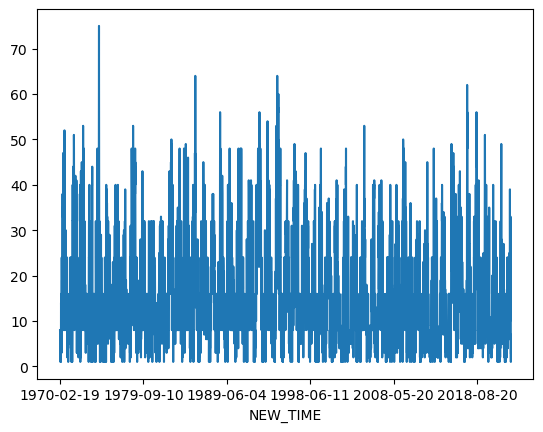

In [56]:
# dataframe timeseries to string time
df3_6['NEW_TIME'] = df3_6['ISO_TIME'].dt.strftime('%Y-%m-%d')

#Plot
df3_6.groupby('NEW_TIME').count()['SID'].plot()

# 3.8 Calculate the climatology of datapoint counts as a function of day of year. The day of year is the sequential day number starting with day 1 on January 1st.

In [57]:
#df3_6.iloc[0,17].split('-')[0]
df3_6.iloc[0,17]
df3_6.iloc[0,17].split('-')

['1970', '02', '19']

In [58]:
# determine the leap year
def isleap(year):
    return ( ( int(year)%400==0) | (  ( int(year)%100!=0) & ( int(year)%4==0)  ) )

# Days of each month
days = [31,28,31,30,31,30,31,31,30,31,30,31]

# Day of year
def day_of_year(date):
    # split data string: '1970-02-19'
    # we got datearray = ['1970', '02', '19']
    datearray = date.split('-')
    
    #year month day 
    year = int(datearray[0])
    month = int(datearray[1])
    day = int(datearray[2])
    
    # Modify 
    if ( (isleap(year)) & ( month >2 )):
        day += 1
    
    # Compute day
    for i in range(month - 1):
        day += days[i]
    return day

In [59]:
# Create a new column DAY_OF_YEAR
df3_6['DAY_OF_YEAR'] = df3_6.apply(lambda col: day_of_year(col['NEW_TIME']), axis=1)

# counts
#df3_6.groupby('DAY_OF_YEAR').count()

# Climatology 
Count_Mean = df3_6.groupby('DAY_OF_YEAR').count()['SID'].mean()
Count_Mean

C:\Users\92341\AppData\Local\Temp\ipykernel_5296\2798588327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_6['DAY_OF_YEAR'] = df3_6.apply(lambda col: day_of_year(col['NEW_TIME']), axis=1)


481.8360655737705

# 3.9 Calculate the anomaly of daily counts from the climatology.

In [60]:
# Create a new dataframe 'climatology'
df3_9 = df3_6.groupby('DAY_OF_YEAR').count()[['SID']]

# Rename the column
df3_9.columns = ['counts']

# Two columns: 'counts' 'anomaly' 
df3_9['anomaly'] = df3_9['counts'] - Count_Mean

df3_9

,counts,anomaly
DAY_OF_YEAR,,
1,83,-398.836066
2,72,-409.836066
3,74,-407.836066
4,93,-388.836066
5,105,-376.836066
...,...,...
362,158,-323.836066
363,132,-349.836066
364,104,-377.836066


# 3.10 Resample the anomaly timeseries at annual resolution and plot. So which years stand out as having anomalous hurricane activity?

<AxesSubplot:xlabel='ISO_TIME'>

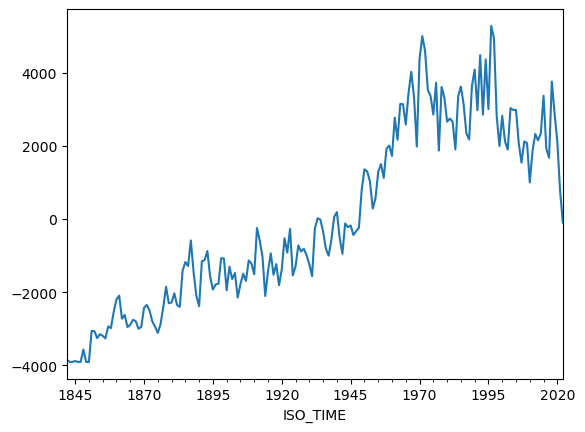

In [61]:
# Resample by year. 
resample_by_year = df.resample('Y',on = 'ISO_TIME').count()

# Anomaly
resample_by_year['anomaly'] = resample_by_year['SID'] - resample_by_year['SID'].mean()

# Plot Anomaly
resample_by_year['anomaly'].plot()

In [62]:
resample_by_year.sort_values('anomaly',ascending = False)
# year 1996

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,anomaly
ISO_TIME,,,,,,,,,,,,,,,,,,
1996-12-31,9189,9189,9189,8128,8389,7443,9189,9189,9189,9189,9189,9189,9189,9189,9189,9189,9189,5281.950276
1971-12-31,8911,8911,8911,7737,8147,7417,8911,8911,8911,8911,8911,8911,8911,8911,8911,8911,8911,5003.950276
1997-12-31,8854,8854,8854,8456,8489,7703,8854,8854,8854,8854,8854,8854,8854,8854,8854,8854,8854,4946.950276
1972-12-31,8503,8503,8503,7764,7808,6991,8503,8503,8503,8503,8503,8503,8503,8503,8503,8503,8503,4595.950276
1992-12-31,8389,8389,8389,7860,7883,7276,8389,8389,8389,8389,8389,8389,8389,8389,8389,8389,8389,4481.950276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850-12-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3907.049724
1849-12-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3907.049724
1847-12-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3907.049724


# 4. Dew point temperature in Yibin from 2000 to 2021.

In [63]:
# Dew point temperature in Yibin from 2000 to 2021.
df4 = pd.read_csv('3122650.csv',parse_dates=['DATE'])

# 4.1 Load the csv, XLS, or XLSX file, and clean possible data points with missing values or bad quality.

In [64]:
# Data Clean
df4_drop = df4.drop( index = df4.loc[ df4['DEW'] == '+9999,9' ].index )


# Create a new column to store DEW Temperature.
df4_drop['DEW_Temperature'] = df4_drop.apply(lambda col: tmprat(sign(col['DEW']),
                                                      tens(col['DEW']),
                                                      one(col['DEW']), 
                                                      point(col['DEW'])), axis=1)

# Create a new column to store Temperature data Quality.
df4_drop['Quality'] = df4_drop.apply(lambda col: quality(col['DEW']),axis=1)

df4_drop

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,DEW,DEW_Temperature,Quality
0,56492099999,"YIBIN, CH",28.8,104.6,342,2000-01-02 00:00:00,4,FM-12,99999,V020,"+0038,1",3.8,1
1,56492099999,"YIBIN, CH",28.8,104.6,342,2000-01-02 03:00:00,4,FM-12,99999,V020,"+0045,1",4.5,1
2,56492099999,"YIBIN, CH",28.8,104.6,342,2000-01-02 06:00:00,4,FM-12,99999,V020,"+0059,1",5.9,1
3,56492099999,"YIBIN, CH",28.8,104.6,342,2000-01-02 09:00:00,4,FM-12,99999,V020,"+0062,1",6.2,1
4,56492099999,"YIBIN, CH",28.8,104.6,342,2000-01-02 12:00:00,4,FM-12,99999,V020,"+0056,1",5.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63896,56492099999,"YIBIN, CH",28.8,104.6,342,2021-12-31 06:00:00,4,FM-12,99999,V020,"+0045,1",4.5,1
63897,56492099999,"YIBIN, CH",28.8,104.6,342,2021-12-31 09:00:00,4,FM-12,99999,V020,"+0041,1",4.1,1
63898,56492099999,"YIBIN, CH",28.8,104.6,342,2021-12-31 12:00:00,4,FM-12,99999,V020,"+0044,1",4.4,1
63899,56492099999,"YIBIN, CH",28.8,104.6,342,2021-12-31 15:00:00,4,FM-12,99999,V020,"+0035,1",3.5,1


# 4.2 Plot the time series of a certain variable.

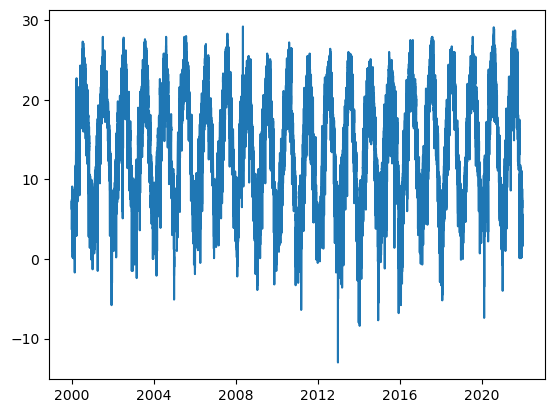

In [65]:
# Time series of DEW_Temperature
plt.plot(df4_drop['DATE'],df4_drop['DEW_Temperature'])

# 4.3 Conduct at least 5 simple statistical checks with the variable, and report your findings.



In [76]:
# Resample by Month
df4_drop_resampleM = df4_drop.resample('M',on = 'DATE',label = 'right').mean()
#df4_drop_resampleM

In [77]:
df4_drop_resampleM.sort_values('DEW_Temperature').head(1)
# Lowest Monthly DEW_Temperature appeared in 2011.01 

,STATION,LATITUDE,LONGITUDE,ELEVATION,SOURCE,CALL_SIGN,DEW_Temperature,HOUR
DATE,,,,,,,,
2011-01-31,5.649210e+10,28.8,104.6,342.0,4.0,99999.0,1.232389,10.469636


In [78]:
df4_drop_resampleM.sort_values('DEW_Temperature').tail(1)
# Highest Monthly DEW_Temperature appeared in 2005.017

,STATION,LATITUDE,LONGITUDE,ELEVATION,SOURCE,CALL_SIGN,DEW_Temperature,HOUR
DATE,,,,,,,,
2005-07-31,5.649210e+10,28.8,104.6,342.0,4.0,99999.0,24.57541,10.45082


In [79]:
df4_drop_resampleQ = df4_drop.resample('Q',on = 'DATE',label = 'right').mean()
#df4_drop_resampleQ

In [80]:
df4_drop_resampleQ.sort_values('DEW_Temperature').head(1)
# Lowest Seasonal DEW_Temperature appeared in 2011 First Season (Spring maybe?)

,STATION,LATITUDE,LONGITUDE,ELEVATION,SOURCE,CALL_SIGN,DEW_Temperature,HOUR
DATE,,,,,,,,
2011-03-31,5.649210e+10,28.8,104.6,342.0,4.0,99999.0,3.723538,10.479109


In [81]:
df4_drop_resampleQ.sort_values('DEW_Temperature').tail(1)
# Highest Seasonal DEW_Temperature appeared in 2017 Third Season(Fall maybe?)

,STATION,LATITUDE,LONGITUDE,ELEVATION,SOURCE,CALL_SIGN,DEW_Temperature,HOUR
DATE,,,,,,,,
2017-09-30,5.649210e+10,28.8,104.6,342.0,4.0,99999.0,22.861255,10.510232


<AxesSubplot:xlabel='HOUR'>

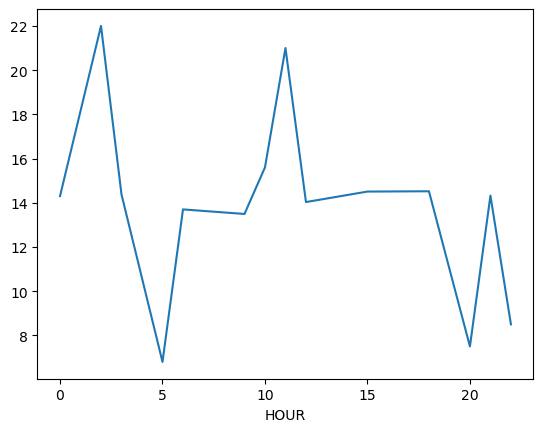

In [82]:
# Create a new column for hour
df4_drop['HOUR'] = df4_drop['DATE'].dt.hour

# Dew point Temperature in a day.
df4_drop.groupby('HOUR').mean()['DEW_Temperature'].plot()

# 5 clock got lowest dew point temperature in a day
# 2 clock got highest dew point temperature in a day